# CoinGecko REST API: extracting crypto currency data

## Libraries and settings

In [1]:
# Libraries
import os
import locale
import pandas as pd
locale.setlocale(locale.LC_ALL,"")

import matplotlib.pyplot as plt

# Define settings for graphics
plt.style.use('dark_background')

from pycoingecko import CoinGeckoAPI
cg = CoinGeckoAPI()

# Settings
import warnings
warnings.filterwarnings("ignore")

# Current working directory
print(f'Current working directory: {os.getcwd()}')

Current working directory: /home/pfrei/Dokumente/GitHub/data_ingestion/03_CoinGecko_WebAPI


## Get data

In [2]:
# Simple price endpoint with the required parameters
cg.get_price(ids='bitcoin', vs_currencies='usd')

{'bitcoin': {'usd': 100208}}

In [3]:
# Multiple arguments (USD)
cg.get_price(ids=['bitcoin', 'near', 'ethereum', 'dogecoin'], vs_currencies='usd')

{'bitcoin': {'usd': 100178},
 'dogecoin': {'usd': 0.161942},
 'ethereum': {'usd': 3228.47},
 'near': {'usd': 2.35}}

In [4]:
# Multiple arguments (USD & EUR)
cg.get_price(ids=['bitcoin', 'near', 'ethereum, dogecoin'], vs_currencies=['usd', 'eur'])

{'bitcoin': {'usd': 100178, 'eur': 86560},
 'dogecoin': {'usd': 0.161942, 'eur': 0.139928},
 'ethereum': {'usd': 3228.47, 'eur': 2789.61},
 'near': {'usd': 2.35, 'eur': 2.03}}

In [5]:
# Pass optional parameters as defined in the API doc (https://www.coingecko.com/api/docs/v3)
data = cg.get_price( ids='bitcoin, near, ethereum, dogecoin', 
                     vs_currencies='usd', 
                     include_market_cap='true', 
                     include_24hr_vol='true', 
                     include_24hr_change='true', 
                     include_last_updated_at='true')
data

{'bitcoin': {'usd': 100178,
  'usd_market_cap': 1998453423623.9656,
  'usd_24h_vol': 84447825282.7734,
  'usd_24h_change': -2.5534005551223045,
  'last_updated_at': 1762525902},
 'dogecoin': {'usd': 0.161942,
  'usd_market_cap': 24564397439.4144,
  'usd_24h_vol': 2001991207.3112733,
  'usd_24h_change': 0.09182864524757609,
  'last_updated_at': 1762525895},
 'ethereum': {'usd': 3228.47,
  'usd_market_cap': 389530575205.93695,
  'usd_24h_vol': 36473967607.96456,
  'usd_24h_change': -3.0552440699142105,
  'last_updated_at': 1762525903},
 'near': {'usd': 2.35,
  'usd_market_cap': 3009740702.218562,
  'usd_24h_vol': 863003667.3925748,
  'usd_24h_change': 18.249270707311727,
  'last_updated_at': 1762525895}}

In [6]:
# Extract single values
names = list(data.keys())
print(names)
print("----------------")

# Price of the first element in list
print(names[0])
print(data[names[0]]["usd"])

['bitcoin', 'dogecoin', 'ethereum', 'near']
----------------
bitcoin
100178


## Extract and plot data

In [7]:
# Keys from dictionary
names = list(data.keys())

# Get values from dictionary and format to 2 decimal places
values = []
for i in range(len(names)):
    vals = data[names[i]]["usd"]
    formatted_val = f'{vals:.2f}'
    values.append(formatted_val)

# Create DataFrame
df = pd.DataFrame({
    'Name': names,
    'Value': values})

# Convert 'Value' column to numeric
df['Value'] = pd.to_numeric(df['Value'])

# Sort DataFrame by 'Value' in descending order
df = df.sort_values(by='Value', ascending=False)

print(df)

       Name      Value
0   bitcoin  100178.00
2  ethereum    3228.47
3      near       2.35
1  dogecoin       0.16


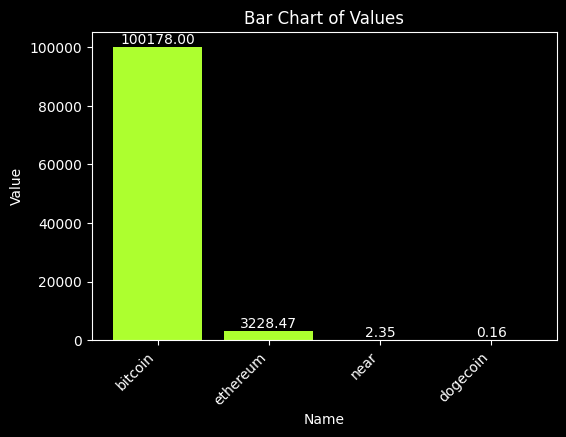

In [8]:
# Create bar chart
plt.figure(figsize=(6, 4))
bars = plt.bar(df['Name'], df['Value'], color='greenyellow')
plt.xlabel('Name')
plt.ylabel('Value')
plt.title('Bar Chart of Values')
plt.xticks(rotation=45, ha='right')

# Add values on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, 
             yval + 0.05, f'{yval:.2f}', 
             ha='center', 
             va='bottom')
plt.show()

### Jupyter notebook --footer info-- (please always provide this at the end of each notebook)

In [9]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')

-----------------------------------
POSIX
Linux | 6.8.0-87-generic
Datetime: 2025-11-07 15:31:45
Python Version: 3.12.12
-----------------------------------
